In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris


In [3]:
iris = load_iris()

In [69]:
X_fts = iris.data
Y_trgt = iris.target

In [8]:
print(iris.DESCR) # description of the dataset


Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [13]:
iris_data = DataFrame(X_fts, columns=['sepal length','sepal width','petal length','petal width'])
iris_target = DataFrame(Y_trgt, columns=['species'])

In [15]:
# there are three types of flower: setosa, versicolor, and Virginica
def change_to_cat(flower):
    if flower == 0: return "Setosa"
    elif flower == 1: return "Versicolour"
    else: return "Virginica"

In [17]:
iris_target['species'] = iris_target['species'].apply(change_to_cat)

In [19]:
iris_target.head()

,species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [20]:
iris_df = pd.concat([iris_target, iris_data], axis=1)

In [21]:
iris_df.head()

,species,sepal length,sepal width,petal length,petal width
0,Setosa,5.1,3.5,1.4,0.2
1,Setosa,4.9,3.0,1.4,0.2
2,Setosa,4.7,3.2,1.3,0.2
3,Setosa,4.6,3.1,1.5,0.2
4,Setosa,5.0,3.6,1.4,0.2


In [26]:
iris_df.dtypes

species         category
sepal length     float64
sepal width      float64
petal length     float64
petal width      float64
dtype: object

In [25]:
iris_df['species'] = iris_df['species'].astype('category')

## Visualization

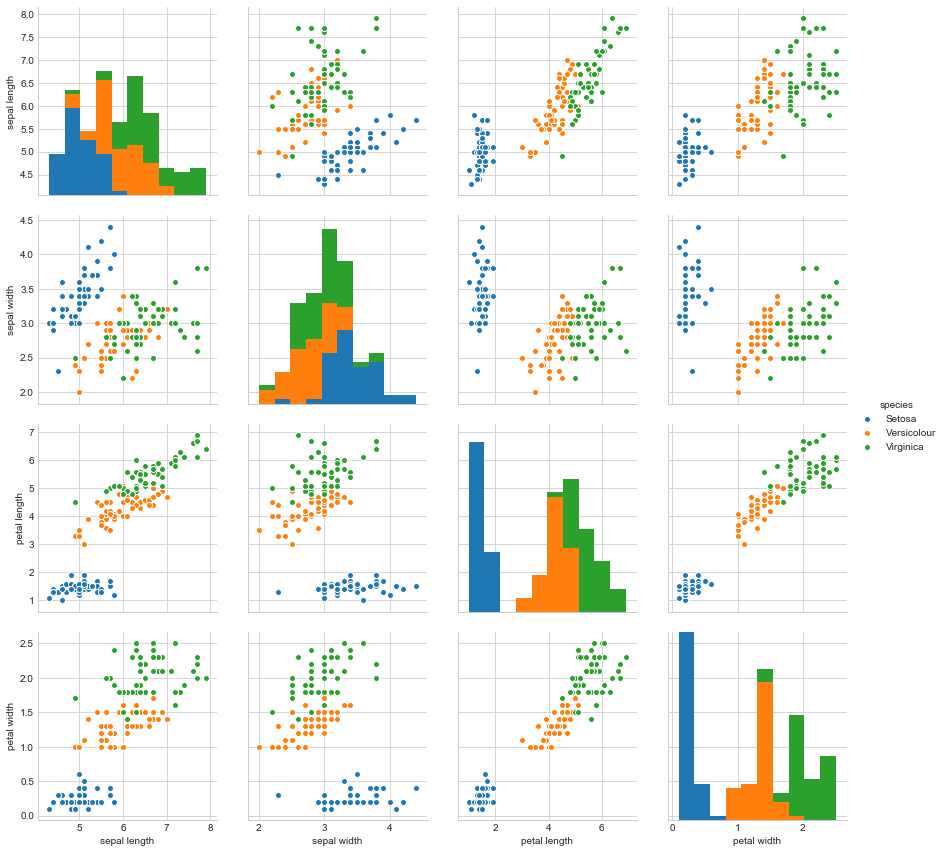

In [30]:
sns.pairplot(iris_df, hue='species', size=3)

In [ ]:
# Setosa looks like it is different from the other two
# thus, the challenge isb to distinct versicolour and virginica

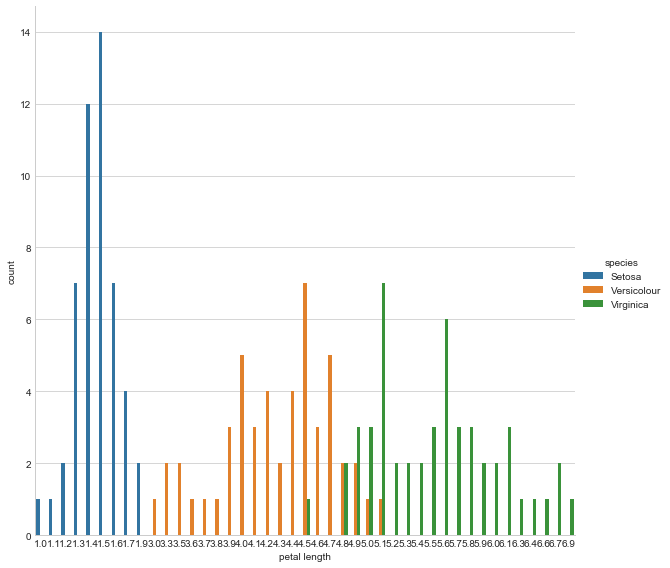

In [39]:
sns.factorplot('petal length', data=iris_df, hue='species',size=8, kind='count')
plt.show()

In [41]:
iris_df.columns

Index(['species', 'sepal length', 'sepal width', 'petal length',
       'petal width'],
      dtype='object')

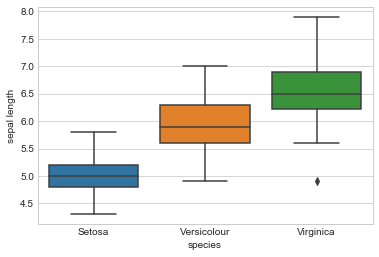

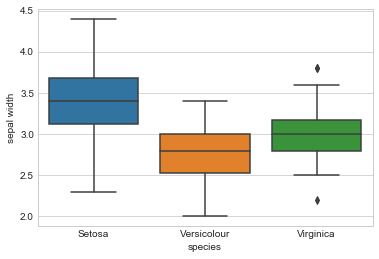

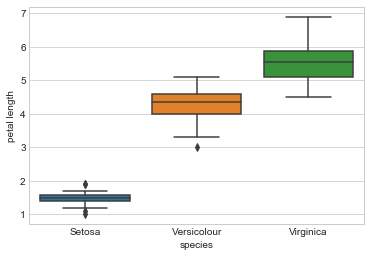

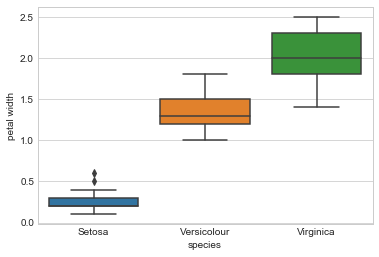

In [45]:
for i in ['sepal length', 'sepal width', 'petal length','petal width']:
    sns.boxplot(x=iris_df['species'],y=iris_df[i])
    plt.show()

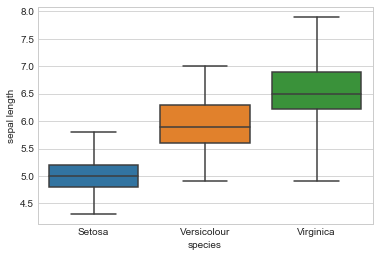

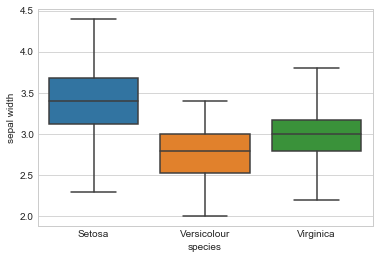

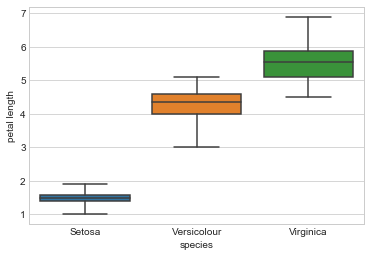

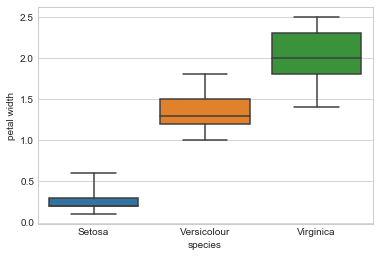

In [46]:
# Notice how the previous plot had outlier points, we can include those with the "whiskers"
for i in ['sepal length', 'sepal width', 'petal length','petal width']:
    sns.boxplot(x=iris_df['species'],y=iris_df[i], whis=np.inf)
    plt.show()

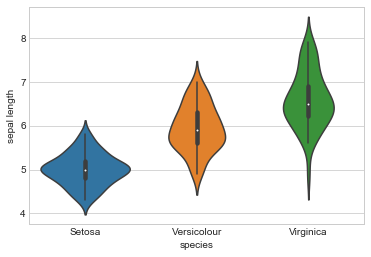

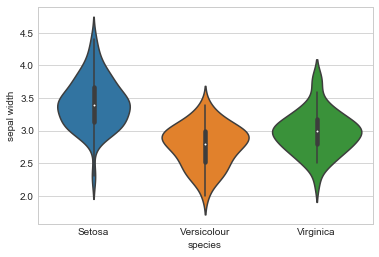

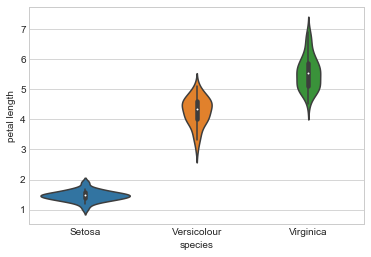

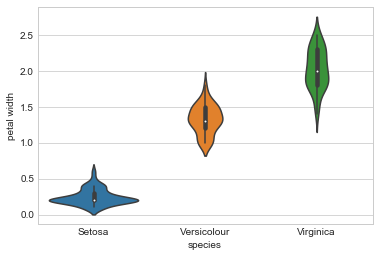

In [47]:
# From the above plots, you may think that the distributions are fairly similar
# But lets check out what a violin plot reveals
for i in ['sepal length', 'sepal width', 'petal length','petal width']:
    sns.violinplot(x=iris_df['species'],y=iris_df[i], whis=np.inf)
    plt.show()
    


- ** Setosa is clearly differernt than the other two type of flowers **

---

## Logistic Regression

In [97]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [71]:
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_fts, Y_trgt, test_size=0.25, random_state=4)

In [73]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
y_pred = logreg.predict(X_test)

In [76]:
# Compare the correct with the predicted value, around 92% accuracy
metrics.accuracy_score(y_test, y_pred)

0.92105263157894735

In [77]:
# based on our visuals, we decied that we found we found that they are pretty separted


In [88]:
# diff test_sizes 
range_to_use = np.arange(0.2, 1.0, 0.1)
range_to_use

array([ 0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [91]:
list_of_scores = []
for i in range_to_use:
    X_train, X_test, y_train, y_test = train_test_split(X_fts, Y_trgt, test_size=i, random_state=4)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    list_of_scores.append(metrics.accuracy_score(y_test, y_pred))

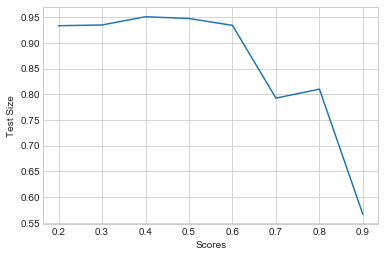

In [96]:
# Plotting the visual between scores and test_size
# Between 0.2 and 0.6 seems the best 
plt.plot(range_to_use, list_of_scores)
plt.xlabel('Scores')
plt.ylabel('Test Size')
plt.show()

## KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier(n_neighbors=6)
X_train, X_test, y_train, y_test = train_test_split(X_fts, Y_trgt, test_size=0.4, random_state=4)

In [153]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [154]:
y_pred = knn.predict(X_test)

In [155]:
print(metrics.accuracy_score(y_test, y_pred))

0.983333333333


In [156]:
# Work through a loop to obtain the best value of the neighbors parameters in the KNeighnors model
k_range = range(1,25)
acc_score = []

for k_val in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc_score.append(metrics.accuracy_score(y_test, y_pred))
    

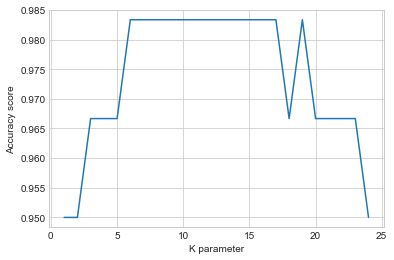

In [157]:
# Plotting the visual between the each k and its score
plt.plot(k_range, acc_score)
plt.xlabel('K parameter')
plt.ylabel('Accuracy score')

---

## Resources/Extra

In [104]:
# Andrew Ng's visual Explanation for Multiclass Classification
from IPython.display import YouTubeVideo
YouTubeVideo("Zj403m-fjqg")

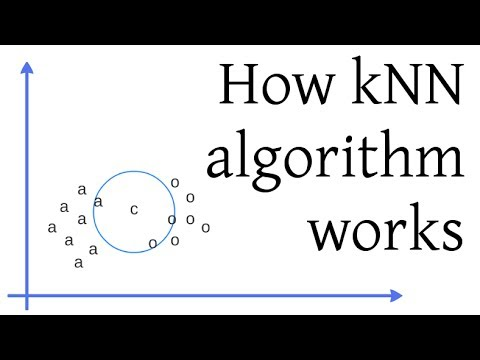

In [100]:
# Short Explanation
from IPython.display import YouTubeVideo
YouTubeVideo('UqYde-LULfs')


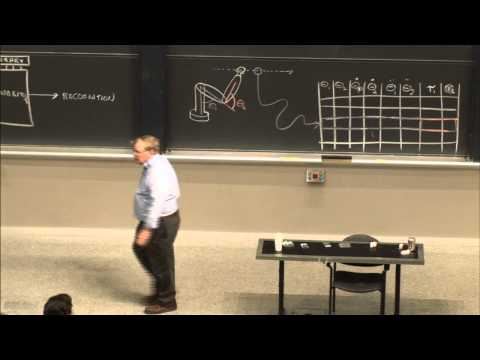

In [101]:
# MIT Lecture
YouTubeVideo('09mb78oiPkA')

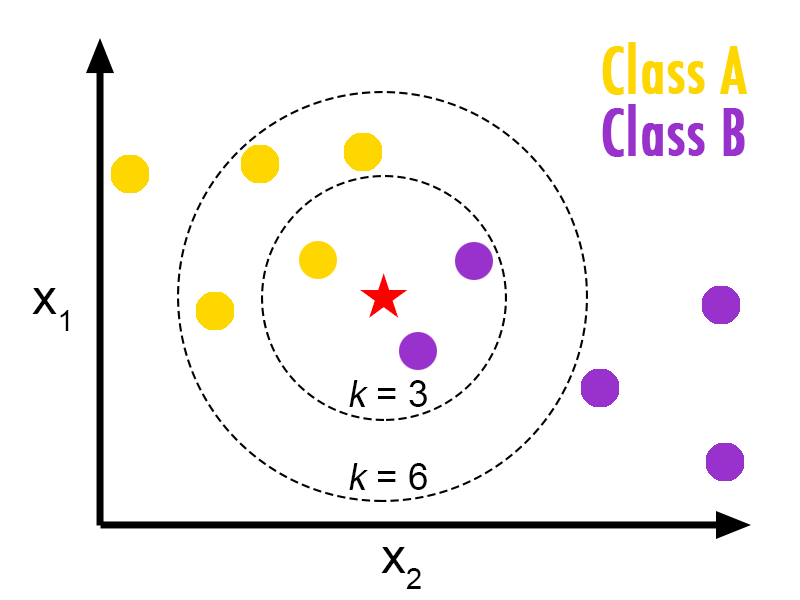

In [103]:
from IPython.display import Image

Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)
